# Medical appointments dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#COMMENTS/Limitations">COMMENTS/Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction :

> I will analysis  the data set of medical appointments to find out what category is taking appointments frequently, is it the category of men or women, and what are the ages, etc. At the beginning, I will download the data after that I will work to clean the data set(Data Wrangling) after that visualization and conclusion.

 **There are many questions that we will discuss, solved, and touch in our analysis:**
*  Q1:What is the most gender(M / F) in taking appointments?
*  Q2: How many people have received a text message and who have not received a text message?
*  Q3: How many have a scholarship?
*  Q4: How many have alcohol addiction?
*  Q5: How many have diabetes?
*  Q6: What are the most ages that take an appointment?
*  Q7: What is the more gender who received a message and did not received a message?
*  Q8: What is the more gender who has a scholarship?
*  Q9: What are the ages and gender that are taking more than in appointments?
*  Q10: Who is the gender M / F who shows up for his appointment who doesn't show up for his appointment?
*  Q11: What is the gender most Injured by diabetes?

# Gathering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#Read dataset of medical appointments
df_appointments=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_appointments.sample(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
29300,6.746443e+13,5693650,F,2016-05-13T07:31:48Z,2016-05-13T00:00:00Z,72,CRUZAMENTO,0,1,1,0,0,0,No
106885,8.261375e+12,5784339,M,2016-06-07T15:39:29Z,2016-06-07T00:00:00Z,3,JABOUR,0,0,0,0,0,0,No
86317,2.651696e+10,5698062,M,2016-05-16T07:13:29Z,2016-06-08T00:00:00Z,27,MÁRIO CYPRESTE,0,0,0,0,0,1,No
25458,7.522369e+12,5672010,M,2016-05-09T07:31:16Z,2016-05-09T00:00:00Z,55,CARATOÍRA,0,1,1,1,0,0,No
52597,2.898551e+13,5691022,F,2016-05-12T11:10:57Z,2016-05-12T00:00:00Z,58,JESUS DE NAZARETH,1,1,0,0,0,0,No
79609,3.865479e+14,5676924,F,2016-05-09T16:53:18Z,2016-05-12T00:00:00Z,45,RESISTÊNCIA,1,1,0,0,0,0,No
5852,5.427475e+12,5726225,F,2016-05-20T13:20:44Z,2016-05-25T00:00:00Z,60,FORTE SÃO JOÃO,0,0,1,0,0,1,No
5289,8.867596e+13,5720448,M,2016-05-19T13:50:47Z,2016-05-24T00:00:00Z,58,REPÚBLICA,0,0,0,0,0,0,No
77688,9.966566e+14,5663097,F,2016-05-05T09:30:12Z,2016-05-05T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,Yes
10230,4.441214e+13,5556684,F,2016-04-07T12:48:34Z,2016-05-11T00:00:00Z,6,CRUZAMENTO,0,0,0,0,0,1,No


# Assessing

In [4]:
#display the dataset of medical appointments 
df_appointments.sample(100)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
79173,2.823889e+12,5629964,F,2016-04-27T14:26:01Z,2016-05-04T00:00:00Z,29,TABUAZEIRO,0,0,0,0,0,1,No
25266,8.582682e+13,5746254,M,2016-05-30T13:41:46Z,2016-05-31T00:00:00Z,9,JESUS DE NAZARETH,0,0,0,0,0,0,No
28736,7.159726e+12,5662620,M,2016-05-05T08:47:40Z,2016-05-06T00:00:00Z,72,CENTRO,0,1,0,0,0,0,Yes
17845,4.648631e+14,5710867,F,2016-05-18T06:40:30Z,2016-05-20T00:00:00Z,78,ILHA DO PRÍNCIPE,0,1,0,0,0,0,Yes
34136,8.888371e+13,5711261,F,2016-05-18T07:26:05Z,2016-05-20T00:00:00Z,89,GURIGICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78427,3.465987e+12,5647064,F,2016-05-02T12:40:44Z,2016-05-06T00:00:00Z,21,SANTA LUÍZA,0,0,0,0,0,0,No
100627,7.723586e+13,5755067,M,2016-06-01T07:02:45Z,2016-06-08T00:00:00Z,52,REDENÇÃO,0,0,0,0,0,1,No
107,7.954396e+12,5608249,F,2016-04-20T13:30:12Z,2016-04-29T00:00:00Z,26,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
90011,3.149120e+14,5769144,M,2016-06-03T08:27:45Z,2016-06-03T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No


In [5]:
#display information of dataset  medical appointments 
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#display describe of dataset  medical appointments 
df_appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#display the data type  of column in dataset  medical appointments 
df_appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#display if there null value  in column of dataset  medical appointments 
df_appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#display if there is duplicate  value  in column of dataset  medical appointments 
sum(df_appointments.duplicated())
df_appointments['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64


# Cleaning 

In [10]:
# Chaning the data type of some column of dataset  medical appointments 
# Chaning the data type of PatientId column to integer 
df_appointments['PatientId']=df_appointments['PatientId'].astype(int)

# Chaning the data type of Gander column to category beacuse there is to value just M oR F
df_appointments['Gender']=df_appointments['Gender'].astype('category')

# Chaning the data type of ScheduledDay column to datetime
df_appointments['ScheduledDay']=pd.to_datetime(df_appointments['ScheduledDay'])

# Chaning the data type of AppointmentDay column to datetime 
df_appointments['AppointmentDay']=pd.to_datetime(df_appointments['AppointmentDay'])

In [11]:
#Create Chaning_datatype function to convert any data type to category type
def Chaning_datatype(new_name):
 df_appointments[new_name]=df_appointments[new_name].astype('category')

#Chaning the data type of Scholarship column to category beacuse there is to value just 0==No oR 1==yes
Chaning_datatype('Scholarship')

#Chaning the data type of Hipertension column to category beacuse there is to value just 0==No oR 1==yes
Chaning_datatype('Hipertension')

# Chaning the data type of SMS_received column to category beacuse there is to value just 0==No oR 1==yes
Chaning_datatype('SMS_received')

# Chaning the data type of Alcoholism column to category beacuse there is to value just 0==No oR 1==yes
Chaning_datatype('Alcoholism')

# Chaning the data type of Diabetes column to category beacuse there is to value just 0==No oR 1==yes
Chaning_datatype('Diabetes')

In [12]:
#Test
#display the data type  of column in dataset  medical appointments 
df_appointments.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                         int64
SMS_received                 category
No-show                        object
dtype: object

In [13]:
# Rename (Replace) a value in column 
# Create Replace_Name function to Rename (Replace) a value in column
def Replace_Name(col_name,old_name,new_name,old_name2,new_name2):
  
  df_appointments[col_name] = df_appointments[col_name].replace([old_name],new_name)
  df_appointments[col_name] = df_appointments[col_name].replace([old_name2],new_name2)

#Rename a value in SMS_received column to 0=No_received, 1=Yes_received
Replace_Name('SMS_received',0,'No_received',1,'Yes_received') 

#Rename a value in Scholarship  column to 0=Don’t_have_Scholarship , 1=Have_Scholarship
Replace_Name('Scholarship',0,'Don’t_have_Scholarship',1,'Have_Scholarship') 

#Rename a value in Hipertension   column to 0=Normal, 1=High
Replace_Name('Hipertension',0,'Normal',1,'High') 

#Rename a value in Diabetes column to 0=UnInjured, 1=Injured
Replace_Name('Diabetes',0,'UnInjured',1,'Injured') 

#Rename a value in Alcoholism column to 0=Unaddicted, 1=Addicted
Replace_Name('Alcoholism',0,'Unaddicted',1,'Addicted') 

In [14]:
#Test
df_appointments.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,Don’t_have_Scholarship,High,UnInjured,Unaddicted,0,No_received,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Don’t_have_Scholarship,High,Injured,Unaddicted,0,No_received,No
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,Don’t_have_Scholarship,High,UnInjured,Unaddicted,0,No_received,No
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,No
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,Don’t_have_Scholarship,Normal,UnInjured,Unaddicted,0,No_received,No


In [15]:
#Dropping Columns
# Drop columns I won't use  
df_appointments.drop(columns=["AppointmentID","ScheduledDay","AppointmentDay","Neighbourhood","Hipertension","Handcap"],axis=1,inplace=True)


In [16]:
#Test 
df_appointments.columns

Index(['PatientId', 'Gender', 'Age', 'Scholarship', 'Diabetes', 'Alcoholism',
       'SMS_received', 'No-show'],
      dtype='object')


**Create a copy from  data set cleand**

In [17]:
#We finish from clean data stage, now the data set (df_appointments)has a ready for go to next stage 
# But we should take a clean  copy from data set(df_appointments)
df_appointments_clean=df_appointments.copy()

# Exploratory & Visualisation 

**Q1:What is the most gender(M / F) in taking appointments?**

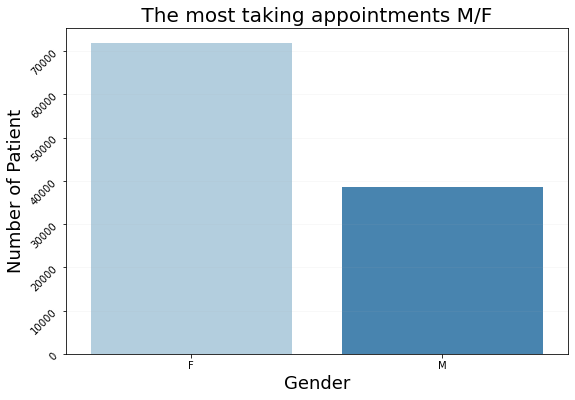

In [18]:
# We will discover who is taking the most appointments by bar chart 
plt.figure(figsize = [9, 6])
sn.countplot(data= df_appointments_clean, x='Gender',alpha=1,linewidth=5,palette="Blues");
plt.grid(axis='y', alpha=0.10)
plt.yticks(rotation = 45)
plt.title(" The most taking appointments M/F ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Gender',fontsize=18);

The difference is quite clear; females(7000 Patient) take more appointments than men(4000 Patient) 

**Q2: How many people have received a text message and who have not received a text message?**

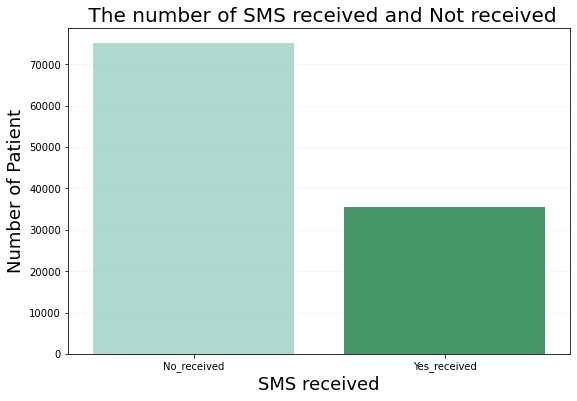

In [19]:
# We will discover who is received a text message and who have not received a text message by bar chart
plt.figure(figsize = [9, 6])
sn.countplot(data= df_appointments_clean, x='SMS_received', alpha=1,palette="BuGn");
plt.grid(axis='y', alpha=0.10)
plt.title(" The number of SMS received and Not received", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('SMS received',fontsize=18);

the number of who is not received(7000 Patient) a text message is more than received (3500 Patient) 

**Q3: How many have a scholarship?**

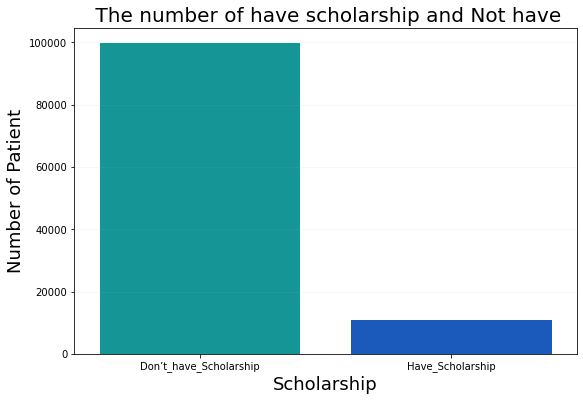

In [20]:
#We will discover How many have a scholarship by bar chart 
plt.figure(figsize = [9, 6])
sn.countplot(data= df_appointments_clean, x='Scholarship', alpha=1,palette="winter_r");
plt.grid(axis='y', alpha=0.10)
plt.title(" The number of have scholarship and Not have", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Scholarship',fontsize=18);

The graphic shows that the number of have a scholarship recipients is small(1500 Patient)  compared to the number Don’t have  a scholarship(9000 Patient) 

**Q4: How many have alcohol addiction?**

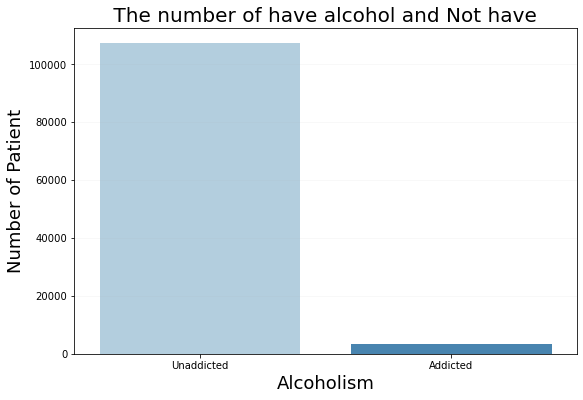

In [21]:
#We will discover How many have alcohol addiction  by bar chart
plt.figure(figsize = [9, 6])
sn.countplot(data= df_appointments_clean, x='Alcoholism', alpha=1,palette="Blues");
plt.grid(axis='y', alpha=0.10)
plt.title(" The number of have alcohol and Not have ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Alcoholism',fontsize=18);

It is clear from the drawing that the number of alcoholics is very small(1000 Patient)  compared to the number of non-alcoholics(100000 Patient) 

**Q5: How many have diabetes?**

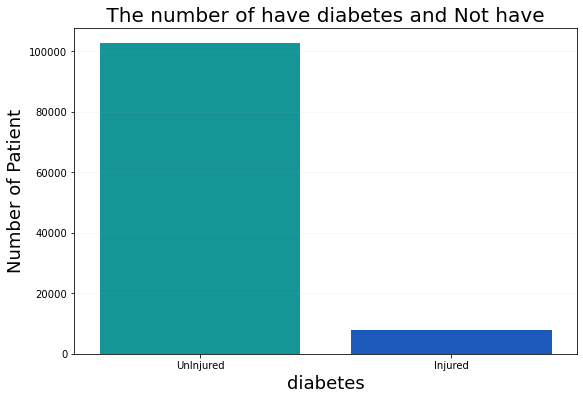

In [22]:
#We will discover How many have diabetes  by bar chart 
plt.figure(figsize = [9, 6])
sn.countplot(data= df_appointments_clean, x='Diabetes', alpha=1,palette="winter_r");
plt.grid(axis='y', alpha=0.10)
plt.title(" The number of have diabetes and Not have ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('diabetes',fontsize=18);

The drawing shows that the number of diabetics is very small (1000 Patient)  compared to the number of non-diabetics(100000 Patient) 

**Q6: What are the most ages that take an appointment?**

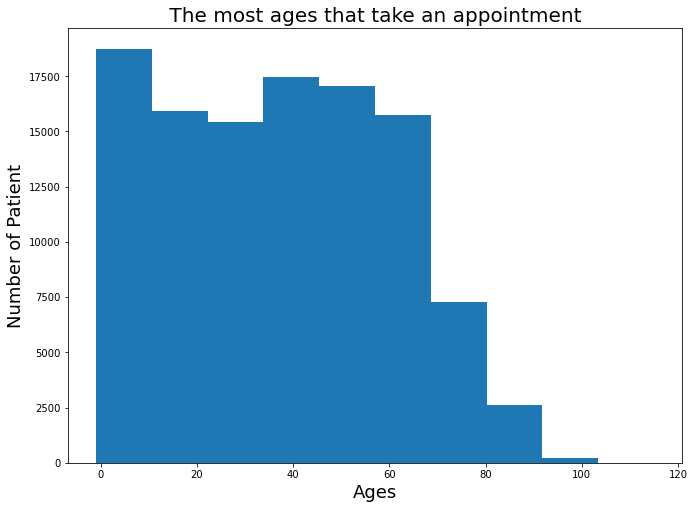

In [23]:
#We will discover What are the most ages that take an appointment by histogram ?
plt.figure(figsize = [11, 8])
plt.hist(data= df_appointments_clean, x='Age', rwidth=1);
plt.title(" The most ages that take an appointment ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Ages',fontsize=18);

We notice through the drawing that the number of people of all ages is similar in taking appointments, but ages from one year to 10 years old (18000 Patient)  were the most in taking appointments

**Q7: What is the more gender who received  a message and  did not  received a message?**

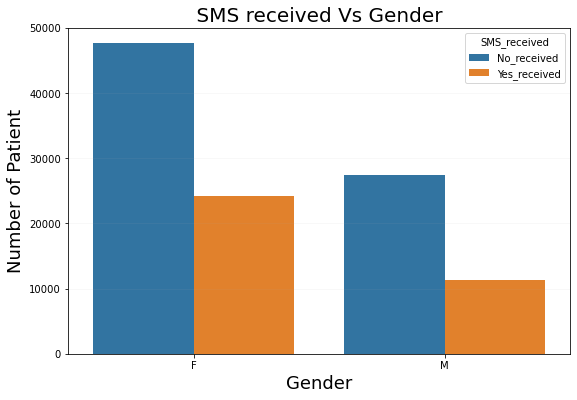

In [24]:
# We will discover What is the more gender who received  a message and  did not  received a message
plt.figure(figsize = [9, 6])
sn.countplot(data=df_appointments_clean, x='Gender', hue='SMS_received',alpha=1);
plt.grid(axis='y', alpha=0.10)
plt.title(" SMS received Vs Gender ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Gender',fontsize=18);

Through the drawing, we notice that the number of females exceeds the number of men in taking appointments
But we care about who receives the message and who does not receive the message, and the result is that the number of those who receive the message and those who do not receive the message are  very close  and the same in both genders.

**Q8: What is the more gender who has a scholarship?**

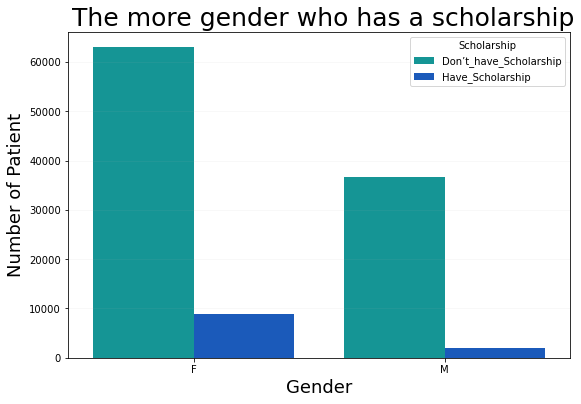

In [25]:
# We will discover What is the more gender who has a scholarship
plt.figure(figsize = [9, 6])
sn.countplot(data=df_appointments_clean, x='Gender', hue='Scholarship',alpha=1,palette="winter_r");
plt.grid(axis='y', alpha=0.10)
plt.title(" The more gender who has a scholarship", fontsize=25)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Gender',fontsize=18);

The result was that females (10000 Patient)  have more scholarships than men (5000 Patient) 

**Q9: What are the ages and gender that are taking more than in appointments?**

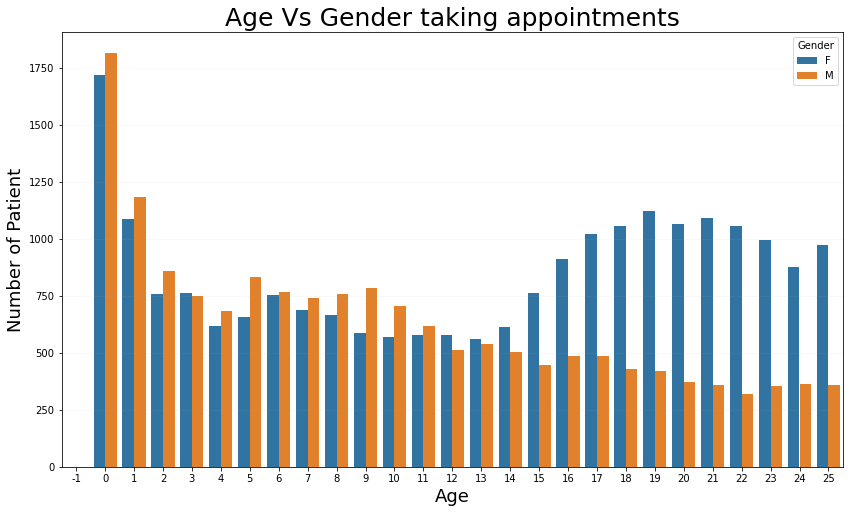

In [26]:
# We will discover What are the ages and gender that are taking more than in appointments
plt.figure(figsize = [14, 8])
some_Ages=df_appointments_clean.query('Age<=25')
sn.countplot(data=some_Ages, x=some_Ages.Age, hue='Gender',alpha=1);
plt.grid(axis='y', alpha=0.10)
plt.title(" Age Vs Gender taking appointments ", fontsize=25)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Age',fontsize=18);

At the beginning of ages, the number of taking appointments in both genders was very close, but with Progress in age ,  the number of females taking appointments was higher than men.

**Q10: Who is the gender M / F who shows up for his appointment who doesn't show up for his appointment?**

In [27]:
df_appointments_clean['No-show'].unique()

array(['No', 'Yes'], dtype=object)

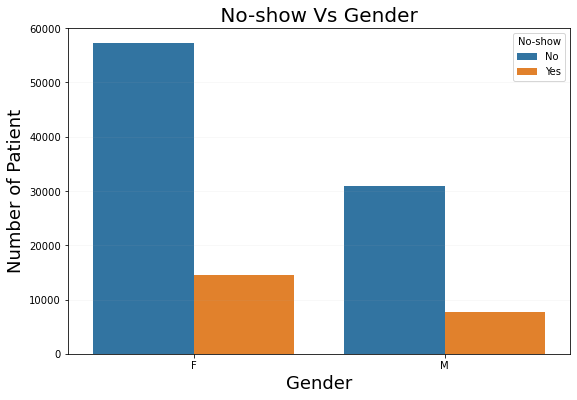

In [28]:
# We will discover What is the more gender who received  a message and  did not  received a message
plt.figure(figsize = [9, 6])
sn.countplot(data=df_appointments_clean, x='Gender' , hue='No-show',alpha=1);
plt.grid(axis='y', alpha=0.10)
plt.title(" No-show Vs Gender ", fontsize=20)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Gender',fontsize=18);

We notice from the drawing that most of the females do not attend their appointments, as their number reaches 55 thousand, and few of them are the ones who bring us to their appointments as their number reaches 15,000, and the number of men who do not attend their appointments is 30,000 and those who attend to their appointments 10,000.

**Q11: What is the gender most Injured by diabetes?**

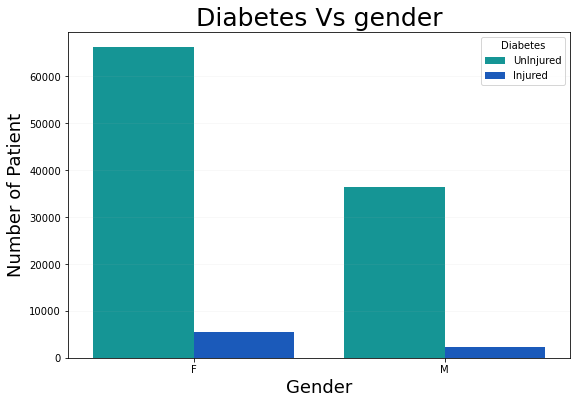

In [29]:
# We will discover What is the gender most Injured by diabetes
plt.figure(figsize = [9, 6])
sn.countplot(data=df_appointments_clean, x='Gender' , hue='Diabetes',alpha=1,palette="winter_r");
plt.grid(axis='y', alpha=0.10)
plt.title("Diabetes Vs gender", fontsize=25)
plt.ylabel('Number of Patient',fontsize=18);
plt.xlabel('Gender',fontsize=18);

Through the drawing, we can see that females are more Injured by diabetes than men

In [30]:
# Create correlation matrix for df_appointments_clean
correlation_matrix= df_appointments_clean.corr() 
correlation_matrix 

,PatientId,Age
PatientId,1.000000,-0.004139
Age,-0.004139,1.000000


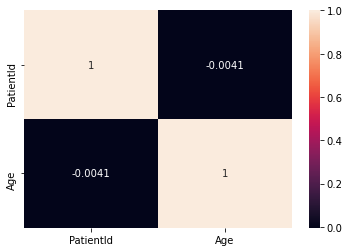

In [31]:
# Create correlation matrix for df_appointments_clean
sn.heatmap(correlation_matrix, annot=True)
plt.show()

# COMMENTS/Limitations :

>The data was free of repeated values ​​and missing values, and this is a distinctive and comfortable thing, and the number of females in taking appointments was much more than men in taking appointments, but the data was not complete to me. There is no column showing the most visited sections or taking appointments from them, is it the esoteric section Or the otolaryngology department,or ect..., and also There is no column showing  indicating at what time those appointments are processed in any morning or evening period also in any month, also how to take the appointment is it from the site or the call center or by attending the center, as well The names of the values ​​were not valid for use because the meaning of the value name was unclear.







<a id='conclusions'></a>
# Conclusions :

> Finally, I analysis  the data set for taking appointments and the dataset contained several useful information such as patientID, patients ages, and patients gender. I asked several questions, and I answered those questions.
* What is the most gender(M / F) in taking appointments?
  * Females (7000 Patient) take more appointments than men (4000 Patient) , and the number of females more than men.
*  How many people have received a text message and who have not received a text message?
 * The number of who is not received(7000 Patient) a text message is more than received (3500 Patient)
*  How many have a scholarship?
 * The graphic shows that the number of have a scholarship recipients is small(1500 Patient) compared to the number Don’t have a scholarship(9000 Patient)
*  How many have alcohol addiction?
  * It is clear from the drawing that the number of alcoholics is very small(1000 Patient) compared to the number of non-alcoholics(100000 Patient)
*  How many have diabetes?
  * The drawing shows that the number of diabetics is very small (1000 Patient) compared to the number of non-diabetics(100000 Patient)
*  What are the most ages that take an appointment?
  * We notice through the drawing that the number of people of all ages is similar in taking appointments, but ages from one year to 10 years old (18000 Patient) were the most in taking appointments
*  What is the more gender who received a message and did not received a message?
  * Through the drawing, we notice that the number of females exceeds the number of men in taking appointments But we care about who receives the message and who does not receive the message, and the result is that the number of those who receive the message and those who do not receive the message are very close and the same in both genders.
*  What is the more gender who has a scholarship?
  * The result was that females (10000 Patient) have more scholarships than men (5000 Patient)
*  What are the ages and gender that are taking more than in appointments?
  * At the beginning of ages, the number of taking appointments in both genders was very close, but with Progress in age , the number of females taking appointments was higher than men.
*  Who is the gender M / F who shows up for his appointment who doesn't show up for his appointment?
  * We notice from the drawing that most of the females do not attend their appointments, as their number reaches 55 thousand, and few of them are the ones who bring us to their appointments as their number reaches 15,000, and the number of men who do not attend their appointments is 30,000 and those who attend to their appointments 10,000.
* What is the gender most Injured by diabetes?
  * Through the drawing, we can see that females are more Injured by diabetes than men.

In [32]:
!jupyter nbconvert --to html /content/Medical_appointments_dataset_template.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern '/content/Medical_appointments_dataset_template.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook ex